<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Miscellaneous Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 133.2 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 107.2 MB/s eta 0:00:00


➡️*Install libraries required for SQL queries, df and plot*

In [4]:
!pip install sqlalchemy

In [5]:
import sqlite3

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


➡️*Connect to SQLite database and execute a query to check the connection*

In [7]:
# Create a connection to SQLite databse
conn = sqlite3.connect('survey-data.sqlite')

In [8]:
#test the SQL query
QUERY="""SELECT * FROM main LIMIT 5""" 
pd.read_sql_query(QUERY,conn)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [12]:
#select variables of interest
QUERY = """SELECT ResponseId, ConvertedCompYearly FROM main""" 
df_histo = pd.read_sql_query(QUERY,conn)

In [21]:
#ConvertedCompYearly median, quantile 75%, 99% and max to set the x range on histogram
print('Median :',df_histo['ConvertedCompYearly'].median())
print('Q_75% :',df_histo['ConvertedCompYearly'].quantile(0.75))
print('Q_99% :',df_histo['ConvertedCompYearly'].quantile(0.99))
print('Max :',df_histo['ConvertedCompYearly'].max())

Median : 65000.0
Q_75% : 107971.5
Q_99% : 393751.0599999984
Max : 16256603.0


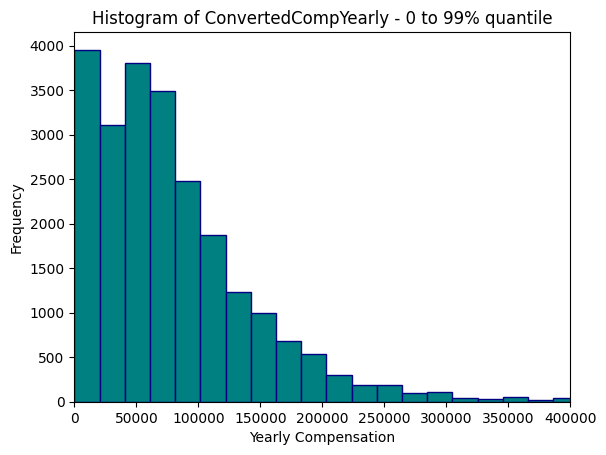

In [25]:
#plot histogram
plt.hist(df_histo['ConvertedCompYearly'], bins=800,color='teal', edgecolor='navy')
plt.title('Histogram of ConvertedCompYearly - 0 to 99% quantile')
plt.ylabel('Frequency')
plt.xlabel('Yearly Compensation')
plt.xlim([0,400000]) #set range between 0 and Quantile 99%
plt.grid()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [26]:
#select the variables using SQLite and create a df
QUERY = """SELECT Age, ResponseId FROM main""" 
df_age = pd.read_sql_query(QUERY,conn)

In [28]:
#age mapping - attribute the mean age of group to each category
age_mapping = {
    'Under 18 years old': 15,
    '18-25 years old': 21.5,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Replace categorical data by numerical data
df_age['Age_numeric'] = df_age['Age'].map(age_mapping)

In [29]:
df_age['Age_numeric'].unique()

array([15. , 39.5, 49.5,  nan, 29.5, 59.5, 70. ])

In [31]:
df_age.head()

,Age,ResponseId,Age_Numeric,Age_numeric
0,Under 18 years old,1,15.0,15.0
1,35-44 years old,2,39.5,39.5
2,45-54 years old,3,49.5,49.5
3,18-24 years old,4,NaN,NaN
4,18-24 years old,5,NaN,NaN


In [42]:
#descriptive stats for Age
df_age['Age_numeric'].describe()

count    51017.000000
mean        36.275781
std         10.639763
min         15.000000
25%         29.500000
50%         29.500000
75%         39.500000
max         70.000000
Name: Age_numeric, dtype: float64

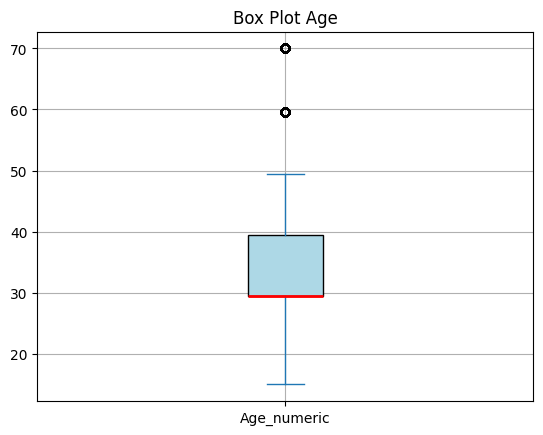

In [46]:
#boxplot Age
df_age['Age_numeric'].plot(kind='box',patch_artist=True, boxprops=dict(facecolor='lightblue'), 
                           medianprops=dict(color='red', linewidth=2))
plt.title('Box Plot Age') 
plt.grid()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [47]:
#Select data using SQL and create a df
QUERY = """SELECT Age,ConvertedCompYearly FROM main""" 
df_scatter = pd.read_sql_query(QUERY,conn)

In [48]:
#convert Age to numerical using function defined previously
# Replace categorical data by numerical data
df_scatter['Age_numeric'] = df_scatter['Age'].map(age_mapping)

In [51]:
df_scatter.head()

,Age,ConvertedCompYearly,Age_numeric
0,Under 18 years old,NaN,15.0
1,35-44 years old,NaN,39.5
2,45-54 years old,NaN,49.5
3,18-24 years old,NaN,NaN
4,18-24 years old,NaN,NaN


In [65]:
#select only ConvertedCompYearly 0 to quantile 99% (remove outlier to improve the scatter plot)
#calculate the Q 99%
Q99 = df_scatter['ConvertedCompYearly'].quantile(0.99)
df_scatter_filtered = df_scatter[df_scatter['ConvertedCompYearly']<Q99]

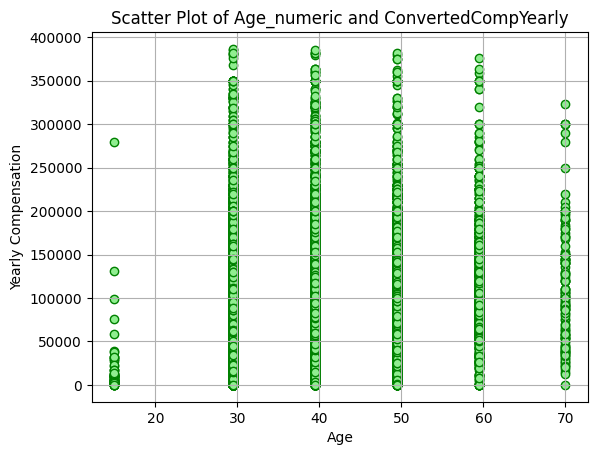

In [66]:
#scatter plot
plt.scatter(df_scatter_filtered['Age_numeric'],df_scatter_filtered['ConvertedCompYearly'], color='lightgreen', edgecolor='green')
plt.title('Scatter Plot of Age_numeric and ConvertedCompYearly') 
plt.xlabel('Age')
plt.ylabel('Yearly Compensation')
plt.grid()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


In [67]:
#select variables using SQL query
QUERY = """ SELECT ConvertedCompYearly,JobSatPoints_6,Age FROM main """ 
df_bubble = pd.read_sql_query(QUERY,conn)

In [68]:
#Convert Age to Age_numeric using the function defined earlier
# Replace categorical data by numerical data
df_bubble['Age_numeric'] = df_bubble['Age'].map(age_mapping)

In [69]:
#filter data for ConvertedCompYearly 0 to 99% quantile previously calculated
df_bubble_filtered = df_bubble[df_bubble['ConvertedCompYearly']<Q99]

/tmp/ipykernel_10686/1634274811.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter =plt.scatter(


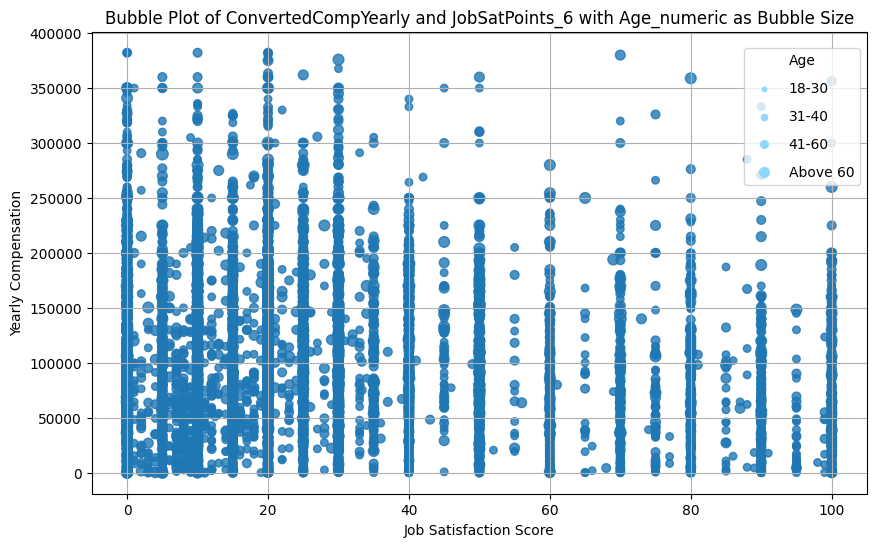

In [77]:
#plot the bubbleplot
plt.figure(figsize=(10, 6))
scatter =plt.scatter(
    df_bubble_filtered['JobSatPoints_6'], df_bubble_filtered['ConvertedCompYearly'],
    s=df_bubble_filtered['Age_numeric'],
    alpha=0.8, cmap='plasma')

handles = [
    plt.scatter([], [], s=10, color='#8fd8fc', label='18-30'),
    plt.scatter([], [], s=20, color='#8fd8fc', label='31-40'),
    plt.scatter([], [], s=30, color='#8fd8fc', label='41-60'),
    plt.scatter([], [], s=50, color='#8fd8fc', label='Above 60')]

plt.legend(handles=handles, title='Age', loc='upper right', bbox_to_anchor=(1,0.98), labelspacing=1)
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation')
plt.title('Bubble Plot of ConvertedCompYearly and JobSatPoints_6 with Age_numeric as Bubble Size')
plt.grid()

plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [81]:
#select data using SQLite query and create a df
QUERY=""" SELECT MainBranch, ResponseId FROM main """ 
df_bar = pd.read_sql_query(QUERY,conn)

In [82]:
df_bar.head()

,MainBranch,ResponseId
0,I am a developer by profession,1
1,I am a developer by profession,2
2,I am a developer by profession,3
3,I am learning to code,4
4,I am a developer by profession,5


In [83]:
df_bar['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [88]:
#group by and count the occurrence of each MainBranch
respondent_counts = df_bar.groupby('MainBranch')['ResponseId'].count().sort_values(ascending=False)

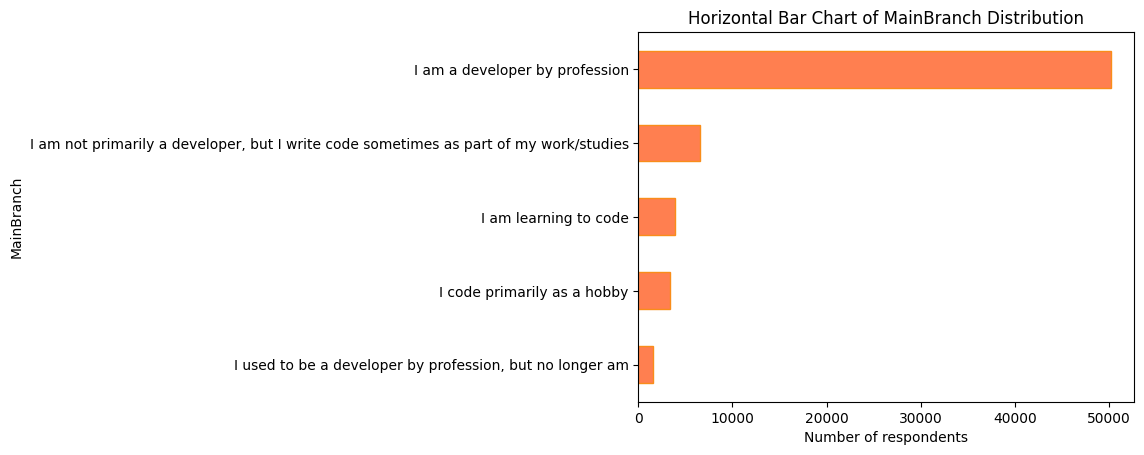

In [90]:
#plot the bar plot
respondent_counts.plot(kind='barh',color='coral',edgecolor='#f98d1a')
plt.title('Horizontal Bar Chart of MainBranch Distribution')
plt.xlabel('Number of respondents')
plt.grid()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [126]:
#select data
QUERY = """SELECT ResponseId, LanguageWantToWorkWith FROM main """
df_lang_bar = pd.read_sql_query(QUERY,conn)

In [127]:
#split the language
df_lang_bar['LanguageWantToWorkWith']=df_lang_bar['LanguageWantToWorkWith'].str.split(';')
df_lang_exploded = df_lang_bar.explode('LanguageWantToWorkWith') 
df_lang_exploded['LanguageWantToWorkWith'].head()

0                       None
1    Bash/Shell (all shells)
1                         Go
1                   HTML/CSS
1                       Java
Name: LanguageWantToWorkWith, dtype: object

In [131]:
#group by and count the occurrence of each 'LanguageWantToWorkWith'
language_counts = df_lang_exploded.groupby('LanguageWantToWorkWith')['ResponseId'].count().sort_values(ascending=False)

In [132]:
language_counts.head()

LanguageWantToWorkWith
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: ResponseId, dtype: int64

In [133]:
#convert serie into df
language_counts.reset_index()

,LanguageWantToWorkWith,ResponseId
0,Python,25047
1,JavaScript,23774
2,SQL,22400
3,HTML/CSS,20721
4,TypeScript,20239
5,Rust,17232
6,Go,13837
7,Bash/Shell (all shells),13744
8,C#,12921
9,C++,10873


In [136]:
#select top 5
top_5_language = language_counts.head()
top_5_language

LanguageWantToWorkWith
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: ResponseId, dtype: int64

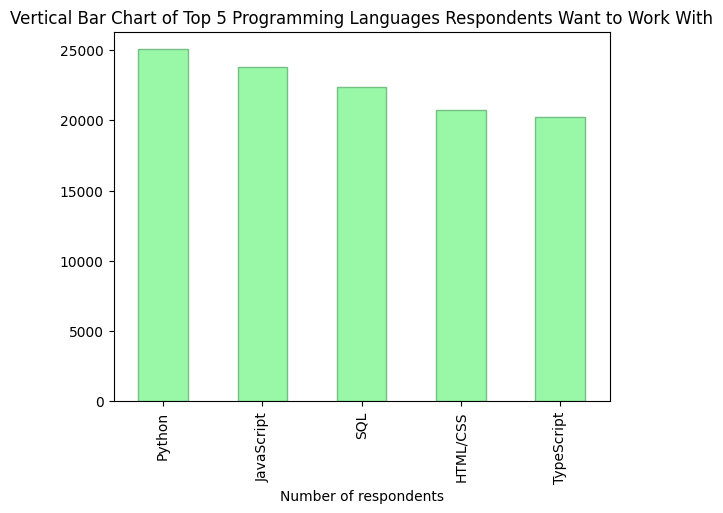

In [138]:
#plot bar chart
top_5_language.plot(kind='bar',color='#98f8a8',edgecolor='#74bf81')
plt.xlabel('Number of respondents')
plt.title('Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With')
plt.grid()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [139]:
#select data using SQL
QUERY="""SELECT JobSatPoints_6,JobSatPoints_7,Age FROM main""" 
df_jobsat = pd.read_sql_query(QUERY,conn)

In [140]:
#group by age, aggregate Job satisfaction by calculating median
df_jobsat_med = df_jobsat.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

In [41]:
# bar plot stacked
plt.bar(df_jobsat_med.index, df_jobsat_med['JobSatPoints_6'], label="JobSatPoints_6", color='teal')
plt.bar(df_jobsat_med.index, df_jobsat_med['JobSatPoints_7'], bottom=df_jobsat_med['JobSatPoints_6'], label="JobSatPoints_7", color='lightgreen')

# labels and title
plt.xlabel('Age')
plt.ylabel('Job Satisfaction score median')
plt.title('Stacked Chart of Median JobSatPoints_6 and JobSatPoints_7 for Different Age Groups')
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid()

# Plot display
plt.show()

NameError: name 'df_jobsat_med' is not defined

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [142]:
#select data using SQLite
QUERY="""SELECT ResponseId, DatabaseHaveWorkedWith FROM main """ 
df_db = pd.read_sql_query(QUERY,conn)

In [143]:
#split database
df_db['DatabaseHaveWorkedWith']=df_db['DatabaseHaveWorkedWith'].str.split(';')  
df_db_exploded = df_db.explode('DatabaseHaveWorkedWith') 
df_db_exploded['DatabaseHaveWorkedWith'].head()

0                          None
1                      Dynamodb
1                       MongoDB
1                    PostgreSQL
2    Firebase Realtime Database
Name: DatabaseHaveWorkedWith, dtype: object

In [144]:
#group by and count the occurrence of each 'DatabaseHaveWorkedWith'
database_counts = df_db_exploded.groupby('DatabaseHaveWorkedWith')['ResponseId'].count().sort_values(ascending=False)

In [145]:
top_10_db = database_counts.head(10)

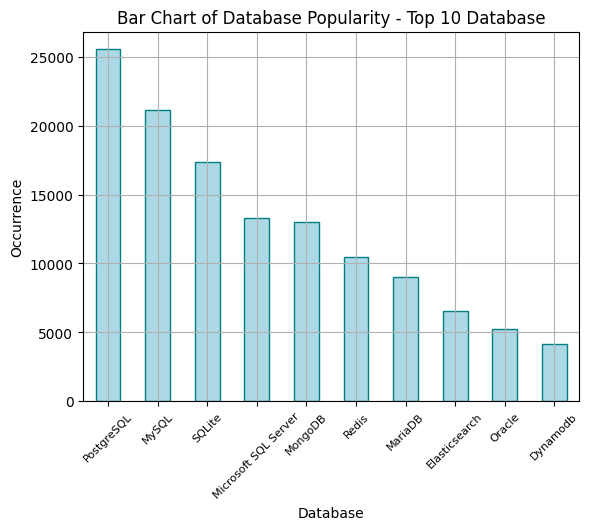

In [147]:
# bar plot
top_10_db.plot(kind='bar', color='lightblue', edgecolor='teal')

# labels and title
plt.xlabel('Database')
plt.ylabel('Occurrence')
plt.title('Bar Chart of Database Popularity - Top 10 Database')
plt.xticks(rotation=45, fontsize=8)
plt.grid()
# Plot display
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



➡️*A grouped Bar chart is not appropriate here since there are only 2 variables*

*Let's plot a simple bar chart*

In [17]:
#select data using SQLite
QUERY="""SELECT ConvertedCompYearly, Age FROM main """  
df_comp = pd.read_sql_query(QUERY,conn)

In [18]:
df_comp.head()

,ConvertedCompYearly,Age
0,NaN,Under 18 years old
1,NaN,35-44 years old
2,NaN,45-54 years old
3,NaN,18-24 years old
4,NaN,18-24 years old


In [19]:
df_comp_grouped = df_comp.groupby('Age')['ConvertedCompYearly'].median()

In [20]:
df_comp_grouped.head()

Age
18-24 years old     25000.0
25-34 years old     59825.0
35-44 years old     84796.0
45-54 years old     99099.0
55-64 years old    109691.0
Name: ConvertedCompYearly, dtype: float64

In [26]:
df_group = df_comp_grouped.reset_index()

In [32]:
#Define the order of age
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older','Prefer not to say']

# Convertir la colonne Age en type catégorique avec un ordre spécifique
#convert Age to categorical with a specific age order
df_group['Age'] = pd.Categorical(df_group['Age'], categories=age_order, ordered=True)

# Sort the df
df_comp_ordered = df_group.sort_values(by='Age')

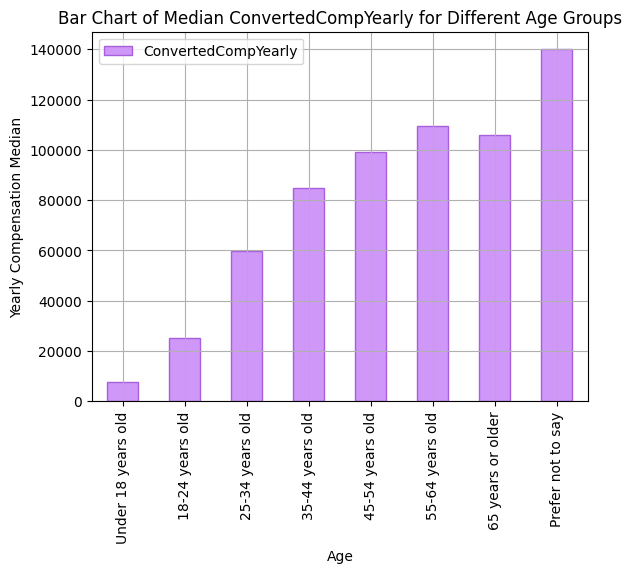

In [40]:
#plot bar plot
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older','Prefer not to say']
ax = df_comp_ordered.plot(kind='bar', color='#cf98f8', edgecolor='#a75fdc') 
plt.title('Bar Chart of Median ConvertedCompYearly for Different Age Groups') 
plt.xlabel('Age') 
ax.set_xticklabels(age_order)
plt.ylabel('Yearly Compensation Median') 
plt.grid()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [55]:
#select variable using SQLite 
QUERY="""SELECT Country,ResponseId FROM main""" 
df_country=pd.read_sql_query(QUERY,conn)

In [56]:
df_country_grouped = df_country.groupby('Country')['ResponseId'].count().sort_values(ascending=False)

In [57]:
df_country_grouped.head()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
Name: ResponseId, dtype: int64

In [58]:
#select Top 15 countries
top_15_country = df_country_grouped.head(15)

In [60]:
top_15_country.head()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
Name: ResponseId, dtype: int64

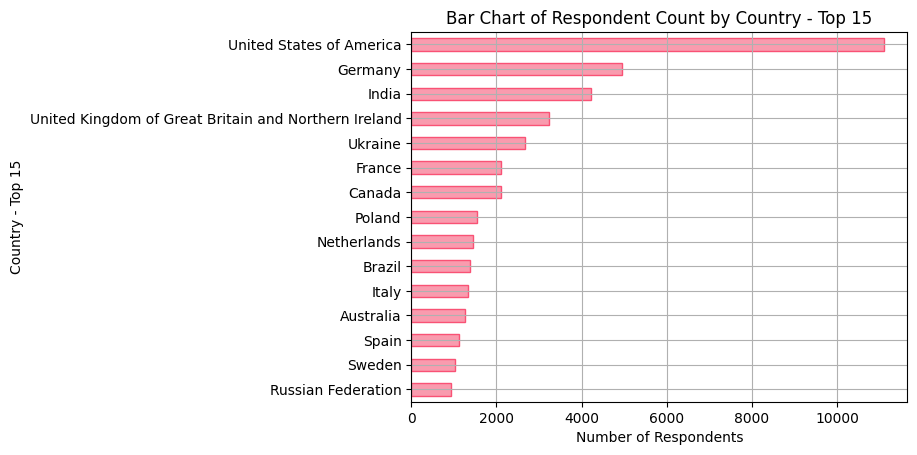

In [68]:
#plot bar plot
top_15_country.plot(kind='barh', color='#f99bae', edgecolor='#f95275') 
plt.title('Bar Chart of Respondent Count by Country - Top 15') 
plt.xlabel('Number of Respondents') 
plt.ylabel('Country - Top 15') 
plt.gca().invert_yaxis()  #invert the order of Country - force descending order
plt.grid()
plt.show()

In [69]:
#close the connection to SQLite
conn.close()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
